# Test Delight on DESC-DC2 simulation  in the context of  Vera C. Rubin Obs (LSST) 


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 22 2022



- run at NERSC with **desc-python** python kernel.


Instruction to have a **desc-python** environnement:
- https://confluence.slac.stanford.edu/display/LSSTDESC/Getting+Started+with+Anaconda+Python+at+NERSC


This environnement is a clone from the **desc-python** environnement where package required in requirements can be addded according the instructions here
- https://github.com/LSSTDESC/desc-python/wiki/Add-Packages-to-the-desc-python-environment

We will use the parameter file "tmps/parametersTestRail.cfg".
This contains a description of the bands and data to be used.
In this example we will generate mock data for the ugrizy LSST bands,
fit each object with our GP using ugi bands only and see how it predicts the rz bands.
This is an example for filling in/predicting missing bands in a fully bayesian way
with a flexible SED model quickly via our photo-z GP.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys,os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

# Initialisation

In [2]:
workdir = "tmp"

# Configuration parameters

- now parameters are generated in a dictionnary

In [3]:
list_of_files = os.listdir(workdir)
list_of_files.remove('data') 
list_of_files.remove('delight_data') 
if '.ipynb_checkpoints' in list_of_files:
    list_of_files.remove('.ipynb_checkpoints')
list_of_configfiles = sorted(list_of_files)

In [4]:
list_of_configfiles

['parametersTest.cfg',
 'parametersTest_1.cfg',
 'parametersTest_10.cfg',
 'parametersTest_11.cfg',
 'parametersTest_12.cfg',
 'parametersTest_13.cfg',
 'parametersTest_14.cfg',
 'parametersTest_15.cfg',
 'parametersTest_16.cfg',
 'parametersTest_17.cfg',
 'parametersTest_18.cfg',
 'parametersTest_19.cfg',
 'parametersTest_2.cfg',
 'parametersTest_20.cfg',
 'parametersTest_21.cfg',
 'parametersTest_3.cfg',
 'parametersTest_4.cfg',
 'parametersTest_5.cfg',
 'parametersTest_6.cfg',
 'parametersTest_7.cfg',
 'parametersTest_8.cfg',
 'parametersTest_9.cfg']

# Filters

- First, we must **fit the band filters with a gaussian mixture**. 
This is done with this script:

In [5]:
from delight.interfaces.rail.processFilters import processFilters

In [6]:
configfilename = list_of_configfiles[1]
configfullfilename = os.path.join(workdir,configfilename) 
processFilters(configfullfilename)

2022-02-02 16:42:18,214 ipykernel_launcher.py delight.interfaces.rail.processFilters[10685] INFO ----- processFilters ------
2022-02-02 16:42:18,225 ipykernel_launcher.py delight.interfaces.rail.processFilters[10685] INFO parameter file is tmp/parametersTest_1.cfg


DC2LSST_u DC2LSST_g DC2LSST_r DC2LSST_i DC2LSST_z DC2LSST_y 

# SED

- Second, we will process the library of SEDs and project them onto the filters,
(for the mean fct of the GP) with the following script (which may take a few minutes depending on the settings you set):

In [7]:
from delight.interfaces.rail.processSEDs import processSEDs

In [8]:
configfilename = list_of_configfiles[1]
configfullfilename = os.path.join(workdir,configfilename) 
processSEDs(configfullfilename)

2022-02-02 16:43:21,032 ipykernel_launcher.py, delight.interfaces.rail.processSEDs[10685] INFO --- Process SED ---


# Train and apply
Run the scripts below. There should be a little bit of feedback as it is going through the lines.
For up to 1e4 objects it should only take a few minutes max, depending on the settings above.

## Template Fitting

In [9]:
from delight.interfaces.rail.templateFitting import templateFitting

In [10]:
templateFitting(configfullfilename)

2022-02-02 16:43:48,716 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO --- TEMPLATE FITTING ---
2022-02-02 16:43:48,722 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO ==> New Prior calculation from Benitez
2022-02-02 16:43:48,728 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO Thread number / number of threads: 1 , 1
2022-02-02 16:43:48,730 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO Input parameter file:tmp/parametersTest_1.cfg
2022-02-02 16:43:48,791 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO Number of Target Objects 507
2022-02-02 16:43:48,793 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[10685] INFO Thread 0 , analyzes lines 0 , to 507


## Gaussian Process

### Training

In [11]:
from delight.interfaces.rail.delightLearn import delightLearn
from delightLearn_HyperParam import delightLearn_HyperParam

In [12]:
#delightLearn_HyperParam(configfullfilename, hyperParam_name="V_C", hyperParam_list=np.linspace(0.1, 1e5, num=30))

In [13]:
delightLearn(configfullfilename)

2022-02-02 16:44:13,051 ipykernel_launcher.py, delight.interfaces.rail.delightLearn[10685] INFO --- DELIGHT-LEARN ---
2022-02-02 16:44:13,140 ipykernel_launcher.py, delight.interfaces.rail.delightLearn[10685] INFO Number of Training Objects 3755
2022-02-02 16:44:13,142 ipykernel_launcher.py, delight.interfaces.rail.delightLearn[10685] INFO Thread 0 , analyzes lines 0 , to 3755


## Predictions

In [14]:
from delight.interfaces.rail.delightApply import delightApply
from delightApply_HyperParam import delightApply_HyperParam

2022-02-02 16:45:47,164 ipykernel_launcher.py, delightApply_HyperParam[10685] INFO --- DELIGHT-APPLY ---
2022-02-02 16:45:47,300 ipykernel_launcher.py, delightApply_HyperParam[10685] INFO Number of Training Objects 3755
2022-02-02 16:45:47,303 ipykernel_launcher.py, delightApply_HyperParam[10685] INFO Number of Target Objects 507
2022-02-02 16:45:47,306 ipykernel_launcher.py, delightApply_HyperParam[10685] INFO Thread 0 , analyzes lines 0 to 507


[0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 3000.0, 8000.0, 10000.0, 59500.0, 109000.0, 158500.0, 208000.0, 257500.0, 307000.0, 356500.0, 406000.0, 455500.0, 505000.0, 554500.0, 604000.0, 653500.0, 703000.0, 752500.0, 802000.0, 851500.0, 901000.0, 950500.0, 1000000.0]
Running sensitivity study for hyperparameter ellSigmaPrior .
ellSigmaPrior value does not affect GP.
Creation of GP with values from config file.
Study of the influence of ellSigmaPrior on likelihood and evidences
Computation of likelihood and evidences for ellSigmaPrior = 0.1
0 0.07268929481506348 0.004275321960449219 0.06670856475830078
100 0.04434084892272949 0.003858327865600586 0.033884525299072266
200 0.05617952346801758 0.004248380661010742 0.04051041603088379
300 0.04955720901489258 0.004390239715576172 0.05885601043701172
400 0.05411076545715332 0.005303621292114258 0.034070730209350586
500 0.056246042251586914 0.008029937744140625 0.04749298095703125
Computation of likelihood and evidences for ellSigmaPrior = 1

500 0.052591562271118164 0.0038385391235351562 0.04855084419250488
Computation of likelihood and evidences for ellSigmaPrior = 406000.0
0 0.06226325035095215 0.0042476654052734375 0.05850815773010254
100 0.0484776496887207 0.0035881996154785156 0.04444718360900879
200 0.05586647987365723 0.004038095474243164 0.029737234115600586
300 0.044371843338012695 0.003911018371582031 0.04591250419616699
400 0.04840993881225586 0.00397491455078125 0.02991962432861328
500 0.054963111877441406 0.005130767822265625 0.049154043197631836
Computation of likelihood and evidences for ellSigmaPrior = 455500.0
0 0.05737948417663574 0.004078388214111328 0.05811572074890137
100 0.04427742958068848 0.0037965774536132812 0.04411172866821289
200 0.04460000991821289 0.004227399826049805 0.0293881893157959
300 0.04769587516784668 0.0046694278717041016 0.04684877395629883
400 0.05531001091003418 0.004623889923095703 0.03885316848754883
500 0.04423952102661133 0.0037343502044677734 0.04848599433898926
Computation o

/home/photoz/Intern2022_PhotoZ/Delight/desc-dc2/delightApply_HyperParam.py:421: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


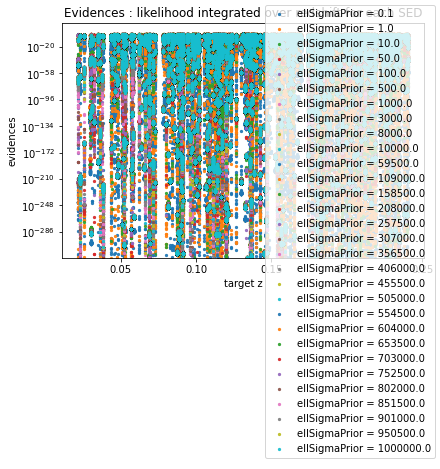

In [15]:
valList=[0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 3000.0, 8000.0]
for elt in np.linspace(1e4, 1e6, num=21):
    valList.append(elt)
print(valList)
delightApply_HyperParam(configfullfilename, hyperParam_name="ellSigmaPrior", hyperParam_list=valList)

In [ ]:
delightApply(configfullfilename)

# Analyze the outputs

In [ ]:
# First read a bunch of useful stuff from the parameter file.
params = parseParamFile(configfullfilename, verbose=False)
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms\
    = readBandCoefficients(params)
bandNames = params['bandNames']
numBands, numCoefs = bandCoefAmplitudes.shape
fluxredshifts = np.loadtxt(params['target_catFile'])
fluxredshifts_train = np.loadtxt(params['training_catFile'])
bandIndices, bandNames, bandColumns, bandVarColumns, redshiftColumn,\
            refBandColumn = readColumnPositions(params, prefix='target_')
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
nt = len(sed_names)
f_mod = np.zeros((redshiftGrid.size, nt, len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')

In [ ]:
# Load the PDF files
metricscww = np.loadtxt(params['metricsFile'])
metrics = np.loadtxt(params['metricsFileTemp'])
# Those of the indices of the true, mean, stdev, map, and map_std redshifts.
i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
i_ze = i_zm
i_std_ze = i_std_zm

pdfs = np.loadtxt(params['redshiftpdfFile'])
pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
nobj = pdfatZ.size
#pdfs /= pdfs.max(axis=1)[:, None]
#pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]

In [ ]:
ncol = 4
fig, axs = plt.subplots(5, ncol, figsize=(12, 12), sharex=True, sharey=False)
axs = axs.ravel()
z = fluxredshifts[:, redshiftColumn]
sel = np.random.choice(nobj, axs.size, replace=False)
lw = 2
for ik in range(axs.size):
    k = sel[ik]
    print(k, end=" ")
    axs[ik].plot(redshiftGrid, pdfs_cww[k, :],lw=lw, label='Standard template fitting')# c="#2ecc71", 
    axs[ik].plot(redshiftGrid, pdfs[k, :], lw=lw, label='New method')  #, c="#3498db"
    axs[ik].axvline(fluxredshifts[k, redshiftColumn], c="k", lw=1, label='Spec-z')
    ymax = np.max(np.concatenate((pdfs[k, :], pdfs_cww[k, :])))
    axs[ik].set_ylim([0, ymax*1.2])
    axs[ik].set_xlim([0, 3.1])
    axs[ik].set_yticks([])
    axs[ik].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
for i in range(ncol):
    axs[-i-1].set_xlabel('Redshift', fontsize=10)
axs[0].legend(ncol=3, frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.4))
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.96)


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
zmax = 3.1
rr = [[0, zmax], [0, zmax]]
nbins = 30
h = axs[0, 0].hist2d(metricscww[:, i_zt], metricscww[:, i_zm], nbins, cmap='Greys', range=rr)
hmin, hmax = np.min(h[0]), np.max(h[0])
axs[0, 0].set_title('CWW z mean')
axs[0, 1].hist2d(metricscww[:, i_zt], metricscww[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[0, 1].set_title('CWW z map')
axs[1, 0].hist2d(metrics[:, i_zt], metrics[:, i_zm], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 0].set_title('GP z mean')
axs[1, 1].hist2d(metrics[:, i_zt], metrics[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 1].set_title('GP z map')
axs[0, 0].plot([0, zmax], [0, zmax], c='k')
axs[0, 1].plot([0, zmax], [0, zmax], c='k')
axs[1, 0].plot([0, zmax], [0, zmax], c='k')
axs[1, 1].plot([0, zmax], [0, zmax], c='k')
#fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
chi2s = ((metrics[:, i_zt] - metrics[:, i_ze])/metrics[:, i_std_ze])**2

axs[0].errorbar(metrics[:, i_zt], metrics[:, i_ze], yerr=metrics[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[1].errorbar(metricscww[:, i_zt], metricscww[:, i_ze], yerr=metricscww[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[0].plot([0, zmax], [0, zmax], 'k')
axs[1].plot([0, zmax], [0, zmax], 'k')
axs[0].set_xlim([0, zmax])
axs[1].set_xlim([0, zmax])
axs[0].set_ylim([0, zmax])
axs[1].set_ylim([0, zmax])
axs[0].set_title('New method')
axs[1].set_title('Standard template fitting')

fig.tight_layout()

In [ ]:
cmap = "coolwarm_r"
vmin = 0.0
alpha = 0.9
s = 5
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
vs = axs[0].scatter(metricscww[:, i_zt], metricscww[:, i_zmap], 
                    s=s, c=pdfatZ_cww, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
vs = axs[1].scatter(metrics[:, i_zt], metrics[:, i_zmap], 
                    s=s, c=pdfatZ, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
clb = plt.colorbar(vs, ax=axs.ravel().tolist())
clb.set_label('Normalized probability at spec-$z$')
for i in range(2):
    axs[i].plot([0, zmax], [0, zmax], c='k', lw=1, zorder=0, alpha=1)
    axs[i].set_ylim([0, zmax])
    axs[i].set_xlim([0, zmax])
    axs[i].set_xlabel('Spec-$z$')
axs[0].set_ylabel('MAP photo-$z$')

axs[0].set_title('Standard template fitting')
axs[1].set_title('New method')

## Conclusion
Don't be too harsh with the results of the standard template fitting or the new methods since both have a lot of parameters which can be optimized!

If the results above made sense, i.e. the redshifts are reasonnable for both methods on the mock data, then you can start modifying the parameter files and creating catalog files containing actual data! I recommend using less than 20k galaxies for training, and 1000 or 10k galaxies for the delight-apply script at the moment. Future updates will address this issue.